# Metaheuristic Experimentation

This notebook allows you to test the implemented metaheuristics (Random, Greedy, Genetic) on the provided problem instances.

In [3]:
!pip install pandas matplotlib

In [1]:
import pandas as pd
import glob

# 1. Cargar TODOS los archivos CSV que tengas en la carpeta
archivos_csv = glob.glob("resultados_*.csv")

if archivos_csv:
    # Leemos cada archivo y los juntamos en una lista
    lista_dfs = []
    for archivo in archivos_csv:
        try:
            d = pd.read_csv(archivo)
            lista_dfs.append(d)
        except Exception as e:
            print(f"No se pudo leer {archivo}: {e}")

    # Concatenamos todo en un gran DataFrame
    df = pd.concat(lista_dfs, ignore_index=True)

    # 2. Crear la Pivot Table (Filas=Instancias, Columnas=Estrategias, Valores=Fitness)
    pivot_df = df.pivot(index='Instance', columns='Strategy', values='Fitness')

    # 3. Mostrar la tabla ESTILIZADA (Highlight del ganador)
    # Esto resalta en verde oscuro el valor más alto de cada fila (la mejor estrategia por instancia)
    display(
        pivot_df.style
        .set_caption("Comparativa de Fitness")
    )
    
    # Si quieres guardar esta tabla comparativa a un Excel para tu informe:
    # pivot_df.to_excel("comparativa_final.xlsx")
    # print("Tabla guardada como comparativa_final.xlsx")

else:
    print("No encontré archivos 'resultados_*.csv'. Asegúrate de haber ejecutado el experimento (main.py).")

Strategy,brkga,brkga2,genetic,greedy,gwo,gwo2,random,tabu,tabu2,tabu_improved,tabu_improved_warnings,vns,vns2
Instance,,,,,,,,,,,,,
instance_n1000_k100_15.json,-inf,-inf,0.261213,0.257564,0.263916,0.386119,0.256919,0.366035,0.369114,0.248135,0.249274,-inf,0.380318
instance_n1000_k50_14.json,-inf,-inf,0.349778,0.345101,0.357068,0.369958,0.344157,0.362185,0.354392,0.346412,0.346113,0.346995,0.372665
instance_n100_k10_7.json,0.370830,0.373816,0.348280,0.324874,0.360222,0.369382,0.326444,0.376563,0.372334,0.370578,0.365754,0.369146,0.366337
instance_n100_k5_5.json,0.350003,0.359108,0.351523,0.341026,0.346656,0.343684,0.346475,0.364371,0.366239,0.363093,0.368481,0.369634,0.359400
instance_n500_k25_9.json,0.336180,0.376302,0.308662,0.282755,0.349465,0.377597,0.283434,0.379958,0.333663,0.300186,0.305388,0.307786,0.381285
instance_n500_k50_12.json,0.348867,-inf,0.348370,0.341446,0.358219,0.369601,0.339874,0.360477,0.355309,0.341354,0.341542,0.341288,0.371045
instance_n50_k2_1.json,0.248125,0.248125,0.246506,0.248122,0.247205,0.247255,0.248125,0.248125,0.247395,0.247075,0.247675,0.248125,0.248125
instance_n50_k2_2.json,0.237500,0.237500,0.234176,0.237500,0.233311,0.236650,0.237500,0.237500,0.237500,0.237500,0.237500,0.237500,0.237500
instance_n50_k5_4.json,0.284042,0.284476,0.269270,0.271086,0.276989,0.275893,0.282105,0.287286,0.277928,0.287286,0.287286,0.287286,0.283528


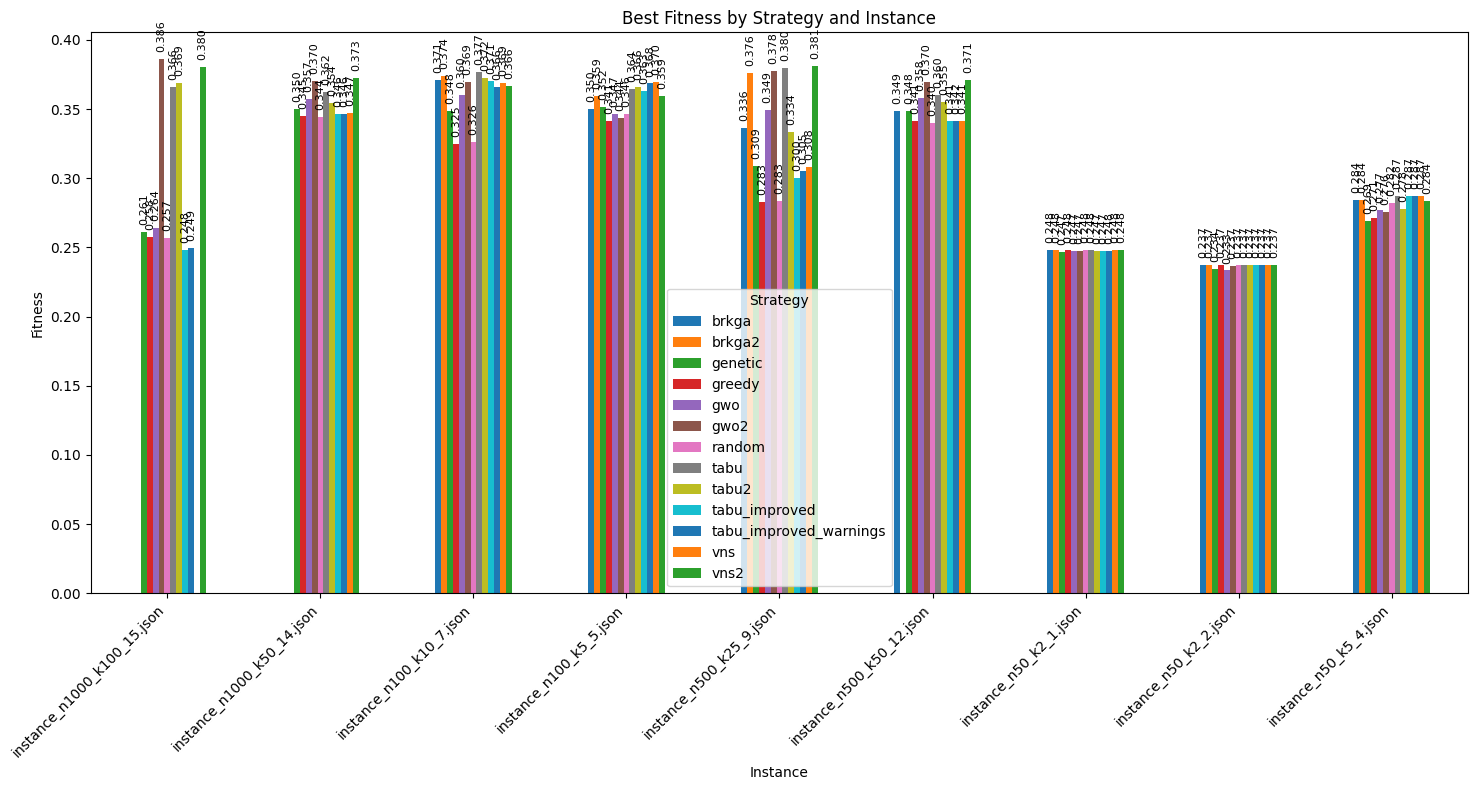

In [2]:
import matplotlib.pyplot as plt

# Visualize Results
ax = pivot_df.plot(kind='bar', figsize=(15, 8))
plt.title('Best Fitness by Strategy and Instance')
plt.ylabel('Fitness')
plt.xlabel('Instance')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Strategy')

# Add labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=8,
                rotation=90)

plt.tight_layout()
plt.show()

In [3]:
# 1. Mean Fitness Analysis
mean_fitness = pivot_df.mean()
print("Mean Fitness per Strategy:")
print(mean_fitness)


Mean Fitness per Strategy:
Strategy
brkga                         -inf
brkga2                        -inf
genetic                   0.301975
greedy                    0.294386
gwo                       0.310339
gwo2                      0.330682
random                    0.296115
tabu                      0.331389
tabu2                     0.323764
tabu_improved             0.304624
tabu_improved_warnings    0.305446
vns                           -inf
vns2                      0.333356
dtype: float64


In [4]:
# 2. Rank Analysis
# Rank strategies for each instance (1 = Best, 3 = Worst)
# method='min' assigns the same rank to ties
ranks_df = pivot_df.rank(axis=1, ascending=False, method='min')

# print("Ranks per Instance (1=Best):")
# display(ranks_df)
display(ranks_df)

# Mean Rank
mean_ranks = ranks_df.mean()
print("\nMean Rank per Strategy (Lower is Better):")
print(mean_ranks)


Strategy,brkga,brkga2,genetic,greedy,gwo,gwo2,random,tabu,tabu2,tabu_improved,tabu_improved_warnings,vns,vns2
Instance,,,,,,,,,,,,,
instance_n1000_k100_15.json,11.0,11.0,6.0,7.0,5.0,1.0,8.0,4.0,3.0,10.0,9.0,11.0,2.0
instance_n1000_k50_14.json,12.0,12.0,6.0,10.0,4.0,2.0,11.0,3.0,5.0,8.0,9.0,7.0,1.0
instance_n100_k10_7.json,4.0,2.0,11.0,13.0,10.0,6.0,12.0,1.0,3.0,5.0,9.0,7.0,8.0
instance_n100_k5_5.json,9.0,7.0,8.0,13.0,10.0,12.0,11.0,4.0,3.0,5.0,2.0,1.0,6.0
instance_n500_k25_9.json,6.0,4.0,8.0,13.0,5.0,3.0,12.0,2.0,7.0,11.0,10.0,9.0,1.0
instance_n500_k50_12.json,6.0,13.0,7.0,9.0,4.0,2.0,12.0,3.0,5.0,10.0,8.0,11.0,1.0
instance_n50_k2_1.json,1.0,1.0,13.0,7.0,11.0,10.0,6.0,1.0,9.0,12.0,8.0,1.0,1.0
instance_n50_k2_2.json,1.0,1.0,12.0,9.0,13.0,11.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0
instance_n50_k5_4.json,6.0,5.0,13.0,12.0,10.0,11.0,8.0,1.0,9.0,2.0,2.0,2.0,7.0



Mean Rank per Strategy (Lower is Better):
Strategy
brkga                      6.222222
brkga2                     6.222222
genetic                    9.333333
greedy                    10.333333
gwo                        8.000000
gwo2                       6.444444
random                    10.000000
tabu                       2.222222
tabu2                      5.000000
tabu_improved              7.111111
tabu_improved_warnings     6.444444
vns                        5.555556
vns2                       3.111111
dtype: float64
